# Get nearest points from Lat/Lon Grid

This builds on my example from

- Stack Overflow: https://stackoverflow.com/questions/58758480/xarray-select-nearest-lat-lon-with-multi-dimension-coordinates
- MetPy Details: https://unidata.github.io/MetPy/latest/tutorials/xarray_tutorial.html?highlight=assign_y_x

In [1]:
from herbie.archive import Herbie
from metpy.units import units
import matplotlib.pyplot as plt
from toolbox.cartopy_tools import pc, common_features, ccrs
import numpy as np
import pandas as pd
import xarray as xr
from shapely.geometry import MultiPoint
from toolbox.gridded_data import pluck_points

🥳 Herbie loaded your custom templates.


In [5]:
H = Herbie('2021-9-23')
ds = H.xarray('TMP:2 m')

🏋🏻‍♂️ Found 2021-Sep-23 00:00 UTC F00 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       


In [6]:
ds

<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2021-09-23
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2021-09-23
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 297.7 297.7 297.8 ... 288.6 288.6 288.6
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /p/cwfs/blaylock/data/hrrr/20210923/hrrr.t00z.wr...
    searchString:            TMP:2 m

In [32]:
dsi = ds.herbie.nearest_points([(-100,40), (-115, 34)], names=['point_a', 'point_b'])
dsi

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:355: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<xarray.Dataset>
Dimensions:              (point: 2)
Coordinates:
    time                 datetime64[ns] 2021-09-23
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (point) float64 40.01 33.99
    longitude            (point) float64 260.0 245.0
    valid_time           datetime64[ns] 2021-09-23
    metpy_crs            object Projection: lambert_conformal_conic
    y                    (point) float64 1.707e+05 -3.483e+05
    x                    (point) float64 -2.135e+05 -1.609e+06
  * point                (point) <U7 'point_a' 'point_b'
Data variables:
    t2m                  (point) float32 25.38 37.06
    gribfile_projection  (point) object None None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /p/cwfs/blaylock/data/hrrr/20210923/hrrr.t00z.wr...
    searchString:            TMP:2 m

cfgrib variable: t2m
GRIB_cfName air_temperature
GRIB_cfVarName t2m
GRIB_name 2 metre temperature
GRIB_units C
GRIB_typeOfLevel heightAboveGround



/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:355: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


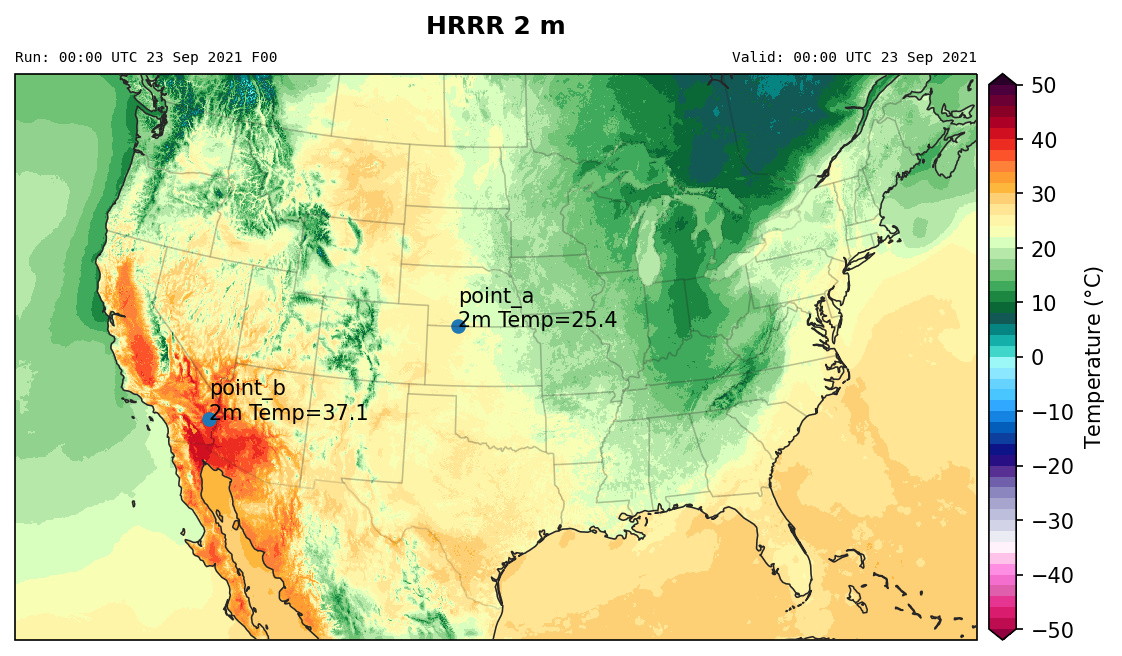

In [33]:
ds.herbie.plot()

plt.scatter(dsi.longitude, dsi.latitude, transform=pc)

for i in dsi.t2m:
    plt.text(i.longitude.item(), i.latitude.item(), f"{i.point.item()}\n2m Temp={i.item():.1f}", transform=pc)

# Plucking point from many Herbie's

In [2]:
from herbie.tools import fast_Herbie_xarray

In [18]:
DATES = pd.date_range('2022-01-01', periods=2, freq='6H')
fxx = range(18)
ds = fast_Herbie_xarray(DATES=DATES, fxx=fxx, searchString='TMP:2 m')
ds

<xarray.Dataset>
Dimensions:              (t: 2, f: 18, y: 1059, x: 1799)
Coordinates:
    time                 (t) datetime64[ns] 2022-01-01 2022-01-01T06:00:00
    step                 (f) timedelta64[ns] 00:00:00 01:00:00 ... 17:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           (f, t) datetime64[ns] 2022-01-01 ... 2022-01-01T23:0...
Dimensions without coordinates: t, f, y, x
Data variables:
    t2m                  (f, t, y, x) float32 292.6 292.6 292.6 ... 274.9 274.9
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    searchString:            TMP:2 m

In [19]:
dsi = ds.herbie.nearest_points((-100,40))
dsi

<xarray.Dataset>
Dimensions:              (t: 2, f: 18, point: 1)
Coordinates:
    time                 (t) datetime64[ns] 2022-01-01 2022-01-01T06:00:00
    step                 (f) timedelta64[ns] 00:00:00 01:00:00 ... 17:00:00
    heightAboveGround    float64 2.0
    latitude             float64 40.01
    longitude            float64 260.0
    valid_time           (f, t) datetime64[ns] 2022-01-01 ... 2022-01-01T23:0...
    metpy_crs            object Projection: lambert_conformal_conic
    y                    float64 1.707e+05
    x                    float64 -2.135e+05
Dimensions without coordinates: t, f, point
Data variables:
    t2m                  (point, f, t) float32 267.2 260.9 265.1 ... 256.0 258.3
    gribfile_projection  (point) object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    searchString:            TMP:2 m

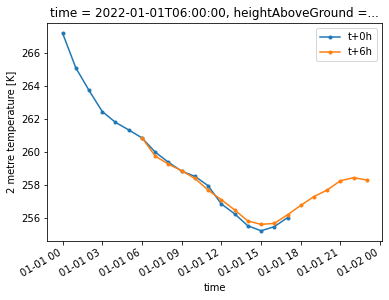

In [21]:
dsi.isel(t=0, point=0).t2m.plot(x='valid_time', marker='.', label='t+0h')
dsi.isel(t=1, point=0).t2m.plot(x='valid_time', marker='.', label='t+6h')
plt.legend()